In [1]:
import numpy as np
import os
import pandas as pd
OUTPUT_FOLDER = "../new_sorted_outputs/"

used_values = [0.25, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

trys_matrix = np.zeros((len(used_values), len(used_values)))
dist_matrix = np.zeros((len(used_values), len(used_values)))
for folder_name in os.listdir(OUTPUT_FOLDER):
    folder_path = os.path.join(OUTPUT_FOLDER, folder_name)
    
    # Solo procesa si es una carpeta con el formato esperado
    if os.path.isdir(folder_path) and folder_name.startswith("a_") and "_b_" in folder_name:
        try:
            # Extrae los valores de a y b del nombre de la carpeta
            a_value = float(folder_name.split("_")[1])
            b_value = float(folder_name.split("_")[3])
            a_index = used_values.index(a_value)
            b_index = used_values.index(b_value)
        except (IndexError, ValueError) as e:
            print(f"Error al extraer valores de a y b de {folder_name}: {e}")
            continue
        for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                try:
                    
                    # Cargar el archivo CSV (puedes ajustar los parámetros de read_csv según el formato)
                    df = pd.read_csv(file_path)
                    last = df.iloc[-1]
                    trys_matrix[a_index, b_index] = last["try_count"]
                    dist_matrix[a_index, b_index] = np.around(np.mean(np.abs(np.array(df[" mx"]) - 100)), decimals=2)
                    print(np.mean(np.abs(np.array(df[" mx"]) - 100)))
                except Exception as e:
                    print(f"Error al procesar el archivo {file_path}: {e}")


14.587966117058249
26.20872226601436
35.60196968618148
1.7148862876262292
4.724191992375745
1.2311263792788727
39.485383092890935
3.2267994928256756
1.4537647483426586
4.080905835461254
40.30234987956351
4.573590262880771
27.449764322431307
13.337642367072032
37.873241872885714
43.31644653237131
37.48630539846199
31.412841176944617
14.9235639182019
1.183981765119062
32.20202093422301
30.350371579376276
9.95449170025425
36.193393935210274
10.00119873576951
32.05646508821086
31.560359755946827
1.8910746564758674
8.161083451705064
44.19922018050008
34.75025607184291
33.486365326942995
8.795694725206399
39.484022866280014
40.00845640307972
30.608617559203857
43.61271692301249
29.421271315786033
10.964316053471787
31.21858119608227
31.712435092328935
31.116833733901995
39.52970834661407
2.307850821889787
28.95249704209862
23.046374346374286
36.86727337881796
6.817024076362183
22.957351039430154
35.525134095806834
7.8159845196178015
24.63681550775598
1.0960911512510474
1.8778211109949408
10.

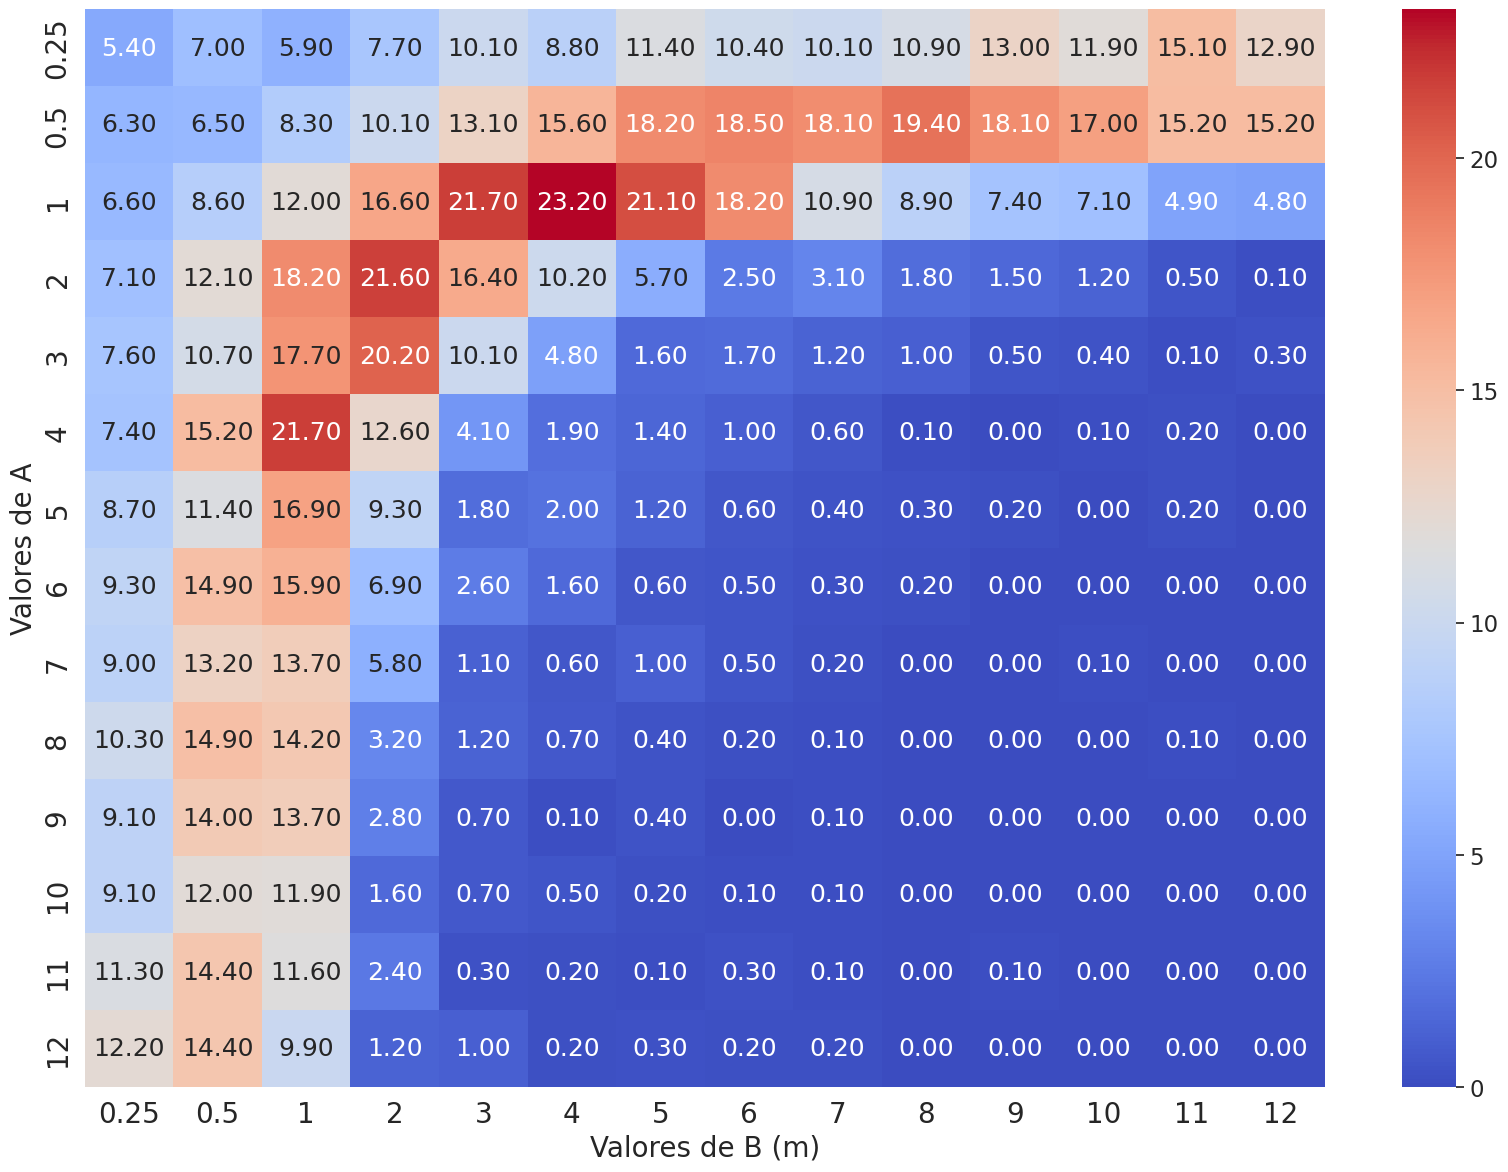

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
data_matrix = trys_matrix.copy()
data_matrix = data_matrix / 1000 * 100
# Create the heatmap
plt.figure(figsize=(20, 14))
sns.set(font_scale=1.5)
sns.heatmap(data_matrix, cmap="coolwarm", xticklabels=used_values, yticklabels=used_values, annot=True, fmt=".2f")


plt.xticks(fontsize=20)      # Font size for x-axis tick labels
plt.yticks(fontsize=20)      # Font size for y-axis tick labels
plt.xlabel("Valores de B (m)", fontsize=20)  # Font size for x-axis label
plt.ylabel("Valores de A", fontsize=20)  # Font size for y-axis label
plt.show()


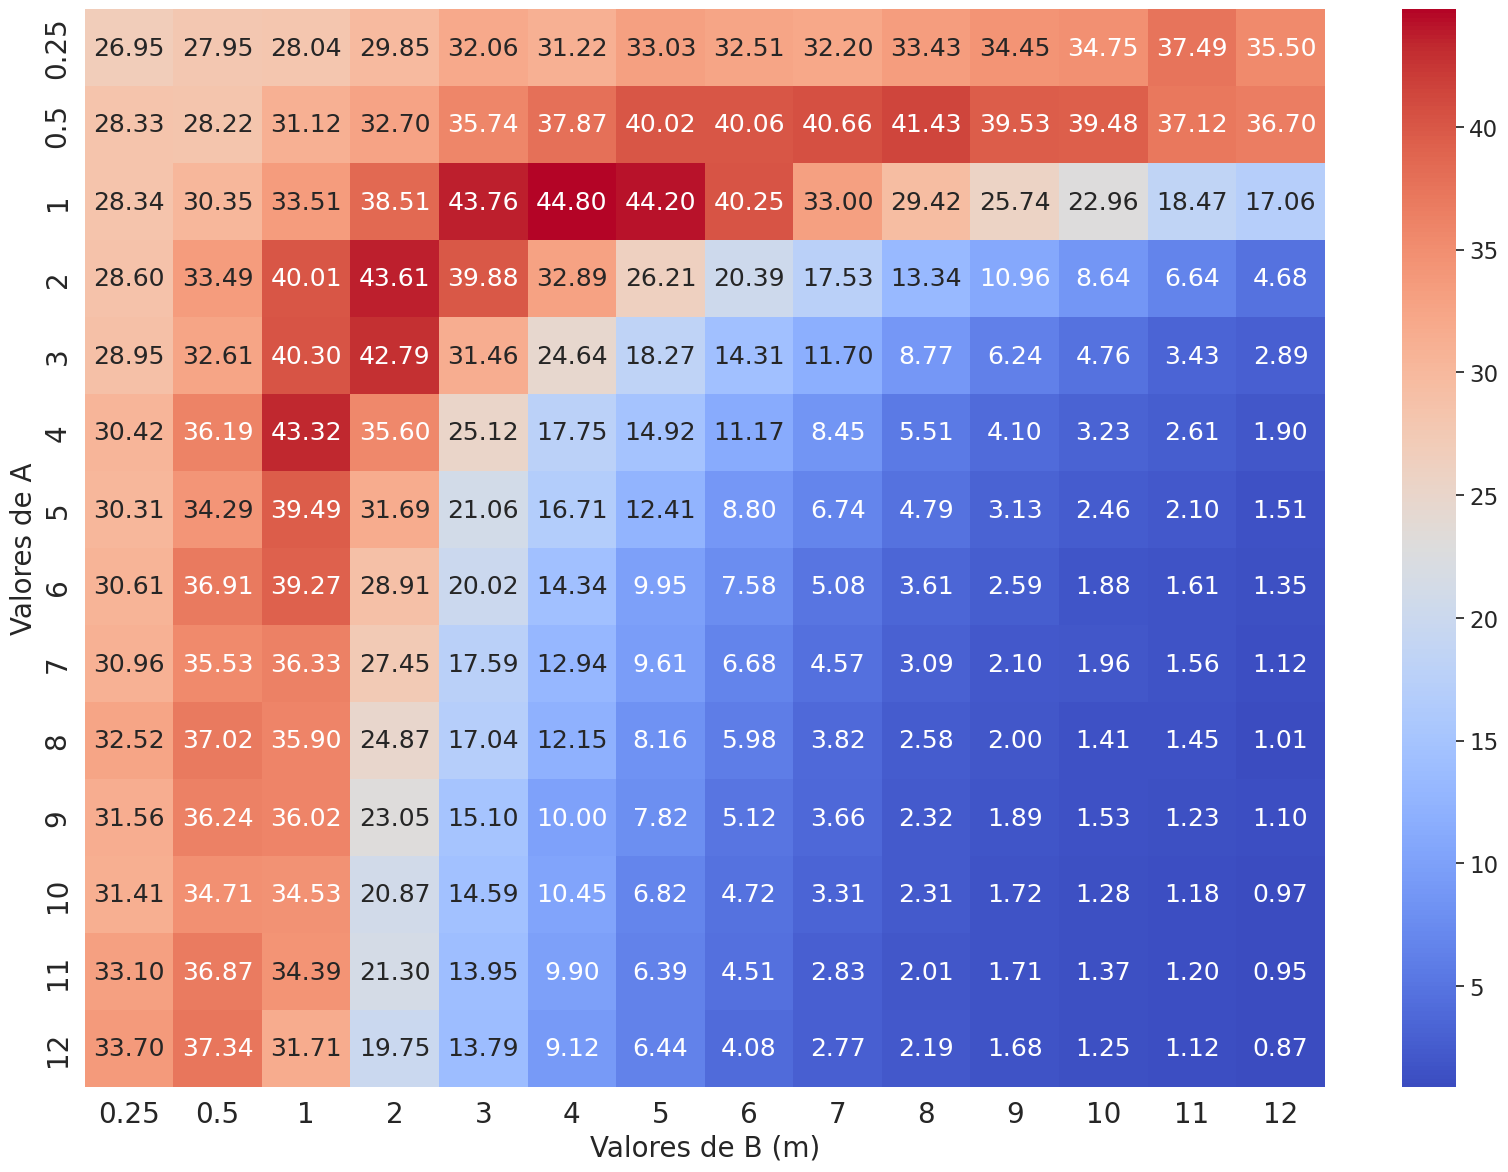

In [3]:
data_matrix = dist_matrix.copy()
#data_matrix = data_matrix / 1000 * 100
# Create the heatmap
plt.figure(figsize=(20, 14))
sns.set(font_scale=1.5)
sns.heatmap(data_matrix, cmap="coolwarm", xticklabels=used_values, yticklabels=used_values, annot=True, fmt=".2f")


plt.xticks(fontsize=20)      # Font size for x-axis tick labels
plt.yticks(fontsize=20)      # Font size for y-axis tick labels
plt.xlabel("Valores de B (m)", fontsize=20)  # Font size for x-axis label
plt.ylabel("Valores de A", fontsize=20)  # Font size for y-axis label
plt.show()


In [4]:
n_values = [15, 20, 25, 30, 45, 60, 75, 90, 100]
dicts = {"trys": {}, "dist":{}}

# Carpeta raíz
root_folder = "../new_multiple_n_outputs"

# Recorre todas las combinaciones de a y b
for a_b_folder in os.listdir(root_folder):
    a_b_path = os.path.join(root_folder, a_b_folder)
    if a_b_folder not in dicts:
        dicts["trys"][a_b_folder] = []
        dicts["dist"][a_b_folder] = []
    if os.path.isdir(a_b_path):
        sorted_folders = sorted(
            os.listdir(a_b_path),
            key=lambda x: int(x.split("_")[1])  # Extracts and converts the value after "n_" to an integer
        )
        # Recorre cada subcarpeta para los valores de n
        for n_folder in sorted_folders:
            n_path = os.path.join(a_b_path, n_folder)
            if os.path.isdir(n_path):                
                # Recorre cada archivo output_n.csv en la carpeta n_folder
                for output_filename in sorted(os.listdir(n_path)):
                    if output_filename.startswith("output") and output_filename.endswith(".csv"):
                        output_file_path = os.path.join(n_path, output_filename)
                        # Leer la última línea del archivo actual usando pandas
                        try:
                            df = pd.read_csv(output_file_path)
                            last_line = df.iloc[-1]  # Obtiene la última fila como cadena
                            dicts["trys"][a_b_folder].append(last_line["try_count"])
                            dicts["dist"][a_b_folder].append(np.array(df[" mx"]))
                        except Exception as e:
                            print(f"Error al procesar {output_file_path}: {e}")

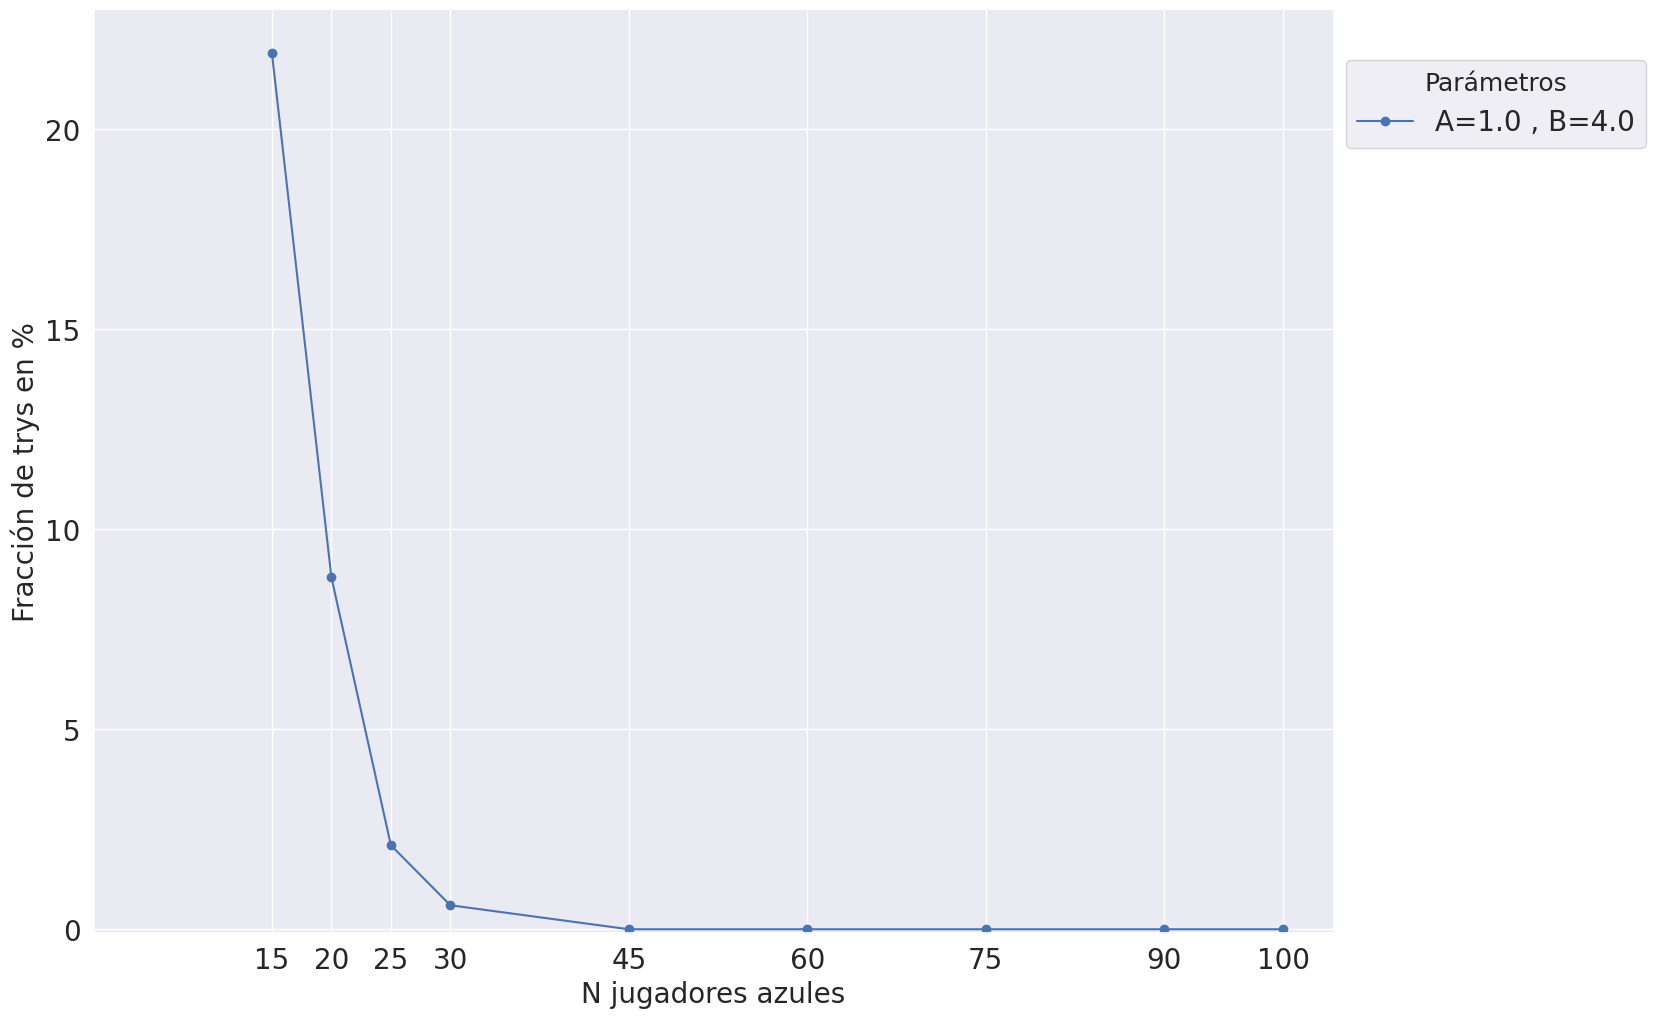

In [5]:
import matplotlib.pyplot as plt

trys_dict = dicts["trys"]

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 12))

# Graficar cada conjunto de datos (a=4, b=1 y a=6, b=0.5)
for label, stats in trys_dict.items():
    stats = np.array(stats)
    # Extrae los valores de a y b del nombre de la carpeta
    a_value = float(label.split("_")[1])
    b_value = float(label.split("_")[3]) 
    ax.errorbar(n_values, stats / 1000 * 100, label=f'A={a_value} , B={b_value}', fmt='o-', capsize=5)

# Personalizar el gráfico
ax.set_xlabel("N jugadores azules", fontsize=20)
ax.set_ylabel("Fracción de trys en %", fontsize=20)
ax.legend(title="Parámetros", fontsize= 20, loc=(1.01, 0.85))
ax.set_xticks(n_values)
ax.tick_params(labelsize=20)
ax.set_xlim(left=0)
ax.set_ylim(bottom=-0.1)
plt.grid(True)
plt.show()

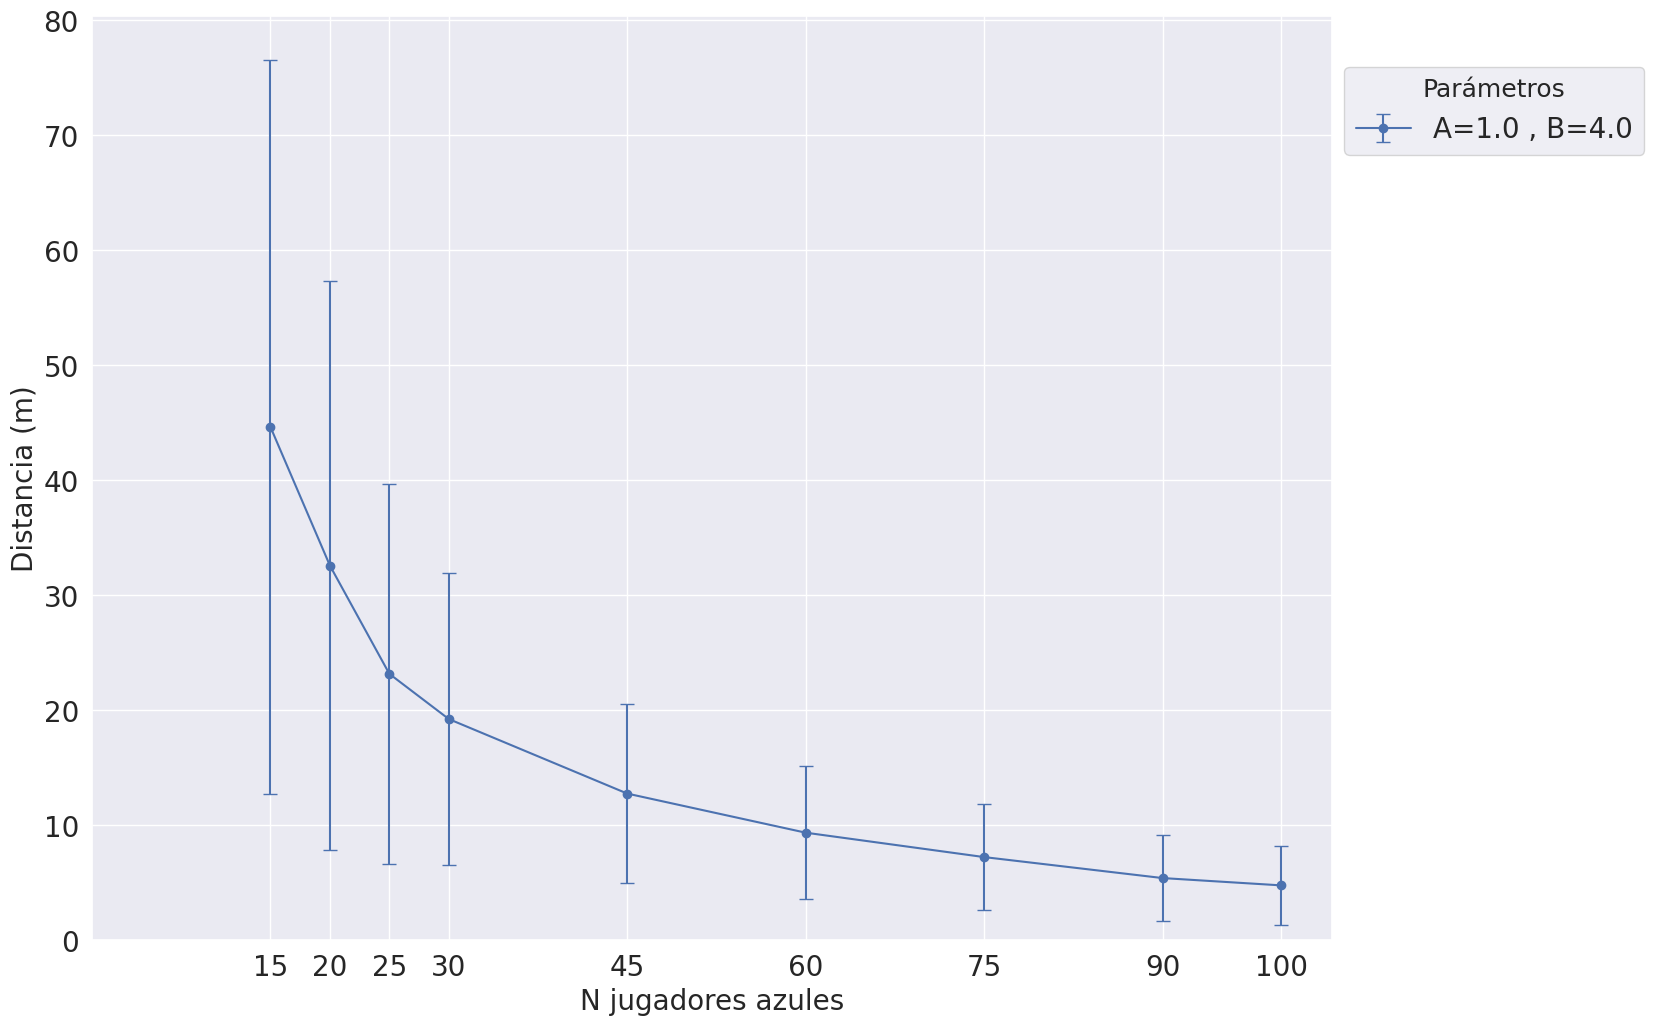

In [6]:
dist_dict = dicts["dist"]

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 12))

# Graficar cada conjunto de datos (a=4, b=1 y a=6, b=0.5)
for label, stats in dist_dict.items():
    stats = np.array(stats)
    means = np.mean(np.abs(stats - 100), axis = 1)
    std = np.std(np.abs(stats - 100), axis = 1)
    a_value = float(label.split("_")[1])
    b_value = float(label.split("_")[3])
    ax.errorbar(n_values, means, yerr=std, label=f'A={a_value} , B={b_value}', fmt='o-', capsize=5)

# Personalizar el gráfico
ax.set_xlabel("N jugadores azules",  fontsize=20)
ax.set_ylabel("Distancia (m)",  fontsize=20)
ax.legend(title="Parámetros", loc=(1.01,0.85), fontsize=20)
ax.set_xticks(n_values)
ax.set_xlim(left=0)
ax.tick_params(labelsize=20)
ax.set_ylim(bottom=0)
plt.grid(True)
plt.show()